<a href="https://colab.research.google.com/github/Fredericoh/machine-learning/blob/master/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving house-prices.csv to house-prices.csv


In [2]:
!ls

house-prices.csv  sample_data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path = 'house-prices.csv'
df = pd.read_csv(path)
df

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,208500,7,2003,2003,856,856,1710,2,8,2,548
1,181500,6,1976,1976,1262,1262,1262,2,6,2,460
2,223500,7,2001,2002,920,920,1786,2,6,2,608
3,140000,7,1915,1970,756,961,1717,1,7,3,642
4,250000,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1999,2000,953,953,1647,2,7,2,460
1456,210000,6,1978,1988,1542,2073,2073,2,7,2,500
1457,266500,7,1941,2006,1152,1188,2340,2,9,1,252
1458,142125,5,1950,1996,1078,1078,1078,1,5,1,240


In [5]:
df.corr()

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
SalePrice,1.000000,0.790982,0.522897,0.507101,0.613581,0.605852,0.708624,0.560664,0.533723,0.640409,0.623431
OverallQual,0.790982,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022
YearBuilt,0.522897,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954
YearRemodAdd,0.507101,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600
TotalBsmtSF,0.613581,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665
1stFlrSF,0.605852,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782
GrLivArea,0.708624,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997
FullBath,0.560664,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656
TotRmsAbvGrd,0.533723,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822
GarageCars,0.640409,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475


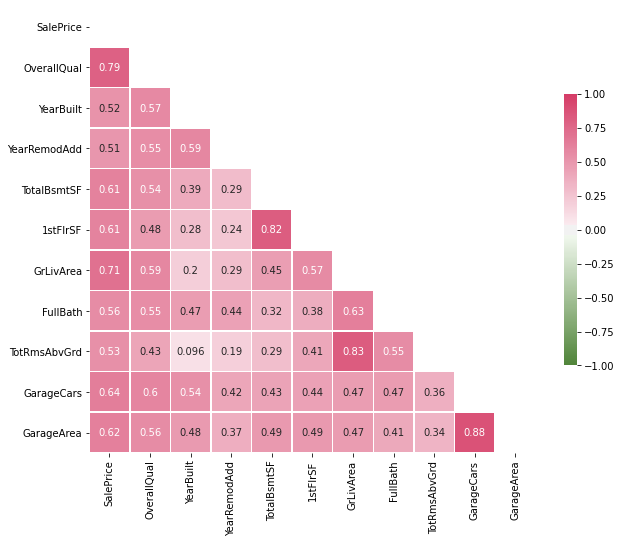

In [6]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(120, 1, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [0]:
knn = KNeighborsRegressor()

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(df['OverallQual'].values.reshape(-1, 1), df['SalePrice'].values, test_size=0.3)

In [9]:
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [10]:
print(df['SalePrice'][0])
print(int(knn.predict(df['OverallQual'][0].reshape(-1, 1))))
print()
print(df['SalePrice'][1])
print(int(knn.predict(df['OverallQual'][1].reshape(-1, 1))))
print()
print(df['SalePrice'][2])
print(int(knn.predict(df['OverallQual'][2].reshape(-1, 1))))

208500
222980

181500
154000

223500
222980
